In [949]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16,15
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = 24
import numpy as np
import os 
import pandas as pd
my_path = os.path.abspath('/Users/juan/Desktop/Git/3level/DATA/PAPER_DATA')
my_path1 = os.path.abspath('/Users/juan/Desktop/3level_img/')



$\beta_c \omega_{10}=5.0$   
$\beta_h \omega_{10}=1.0$

In [950]:

class variables():
    def __init__(self):
        #Carnot efficiency
        self.n_c = 0.8
        #eigen energies parameters
        self.x= np.linspace(0.00000,.999999991,100)
        
        self.w20_10 = (1-self.x*self.n_c)/(1-self.n_c)
       
        # Environment parameters
        self.b_c  = 5.0 
        self.b_h  = 1.0
       #energy variables lambda/w10
        self.l = np.array([np.linspace(0.0001,\
                np.sqrt(((val*(self.n_c**2))*(2-self.n_c-val))\
                 /((1-self.n_c)*((2-self.n_c)**2))) ,100  ) for val in self.x] )
      #instantaneous eigenenergies
        self.e_20 = np.array( [ ((self.w20_10[val]+1)/2 \
                + np.sqrt(((self.w20_10[val]-1)/2 )**2\
             +(self.l[val])**2  ))for val in range(len(self.w20_10)) ])
        
        self.e_10 = np.array([((self.w20_10[val]+1)/2\
                - np.sqrt(((self.w20_10[val]-1)/2 )**2 \
            +(self.l[val])**2 ))for val in range(len(self.w20_10)) ])

    #lindblad constants
        self.coupling= [0,0.05,0.5,2]
        self.g_c10  = 2
        self.g_h10 =  self.coupling[0]
        self.g_h20  = 2
        self.g_c20 = self.coupling[0]
       
        #cosine data
        self.c=  np.array( [(self.w20_10[val] -1 )/(self.e_20[val]-self.e_10[val]) for val in range(len(self.w20_10)) ])
        #power variables
    @property
    def g1(self):
        return 1/2*(self.g_c10*(1+self.c) + self.g_h10*(1-self.c))
    @property
    def g2(self):
        return 1/2*(self.g_c20*(1-self.c) + self.g_h20*(1+self.c)) 
    @property
    def g1m(self):
        return 1/2*(self.g_c10*(1+self.c)*np.exp(-self.b_c*self.e_10)\
             + self.g_h10*(1-self.c)*np.exp(-self.b_h*self.e_10)) 
    @property       
    def g2m(self):
        return  1/2*(self.g_c20*(1-self.c)*np.exp(-self.b_c*self.e_20) \
            + self.g_h20*(1+self.c)*np.exp(-self.b_h*self.e_20)) 
    @property
    def omega(self):
        return ((self.e_20-self.e_10)**2 + ( ((self.g1+self.g2)/2)**2))\
                /((self.e_20-self.e_10)*self.c )
    @property
    def G(self):
        return  1/2*(self.g1+self.g2)*(1 + 1/4*(1/((self.e_20-self.e_10)**2))\
                *((self.g1+self.g2)**2))
    @property
    def q1(self):
        return (var.g_h10*((1-var.c)/2)) /( (var.g_c10*(1+var.c)/2)+ var.g_h10*((1-var.c)/2) )
    @property
    def q2(self):
        return (var.g_c20*((1-var.c)/2)) /( (var.g_h20*(1+var.c)/2)+ var.g_c20*((1-var.c)/2) )
var = variables()


$ P = \frac{\frac{1}{2}sin^2(\theta)\; \epsilon_{21} \;\omega^2 \;\big(\;\frac{g_2^-}{g_2}-\;\frac{g_1^-}{g_1} \big)}{\big( \frac{1}{2}+\frac{g_1^-}{g_1} \big) \big( \frac{sin^2(\theta)\;\omega^2}{g_2}\;\;+G \big)+\big( \frac{1}{2}+\frac{g_2^-}{g_2} \big) \big( \frac{sin^2(\theta)\;\omega^2}{g_1}\;\;+G \big)}$

In [951]:
       
 def POWER(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m
    g1m = var.g1m
    g2 = var.g2
    g1 = var.g1
    G  = var.G
    omega = var.omega
    return (1/2*(e_20-e_10)*(1-c**2)*(omega**2)*( (g2m/g2) - (g1m/g1)))\
            /( (1/2+(g2m/g2))*( ((1-c**2)*omega**2)/g1 +G )\
             +(1/2+(g1m/g1))*( ((1-c**2)*omega**2)/g2 +G ) ) 



P= POWER(var)  
P.shape
l2= len(var.l.T)
P>=0

array([[False, False, False, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False]])

In [952]:
def data(var,P):
    l1= len(var.w20_10)
    l2= len(var.l.T)
    d = {}
    df = pd.DataFrame(data=d)
    for i in range(l1):
        df['w_rate_'+str(i)]= np.array(l2*[var.w20_10[i]])
        df['lambda_w10_'+str(i)]= var.l[i]
        df['power_'+str(i)]= P[i]
    return df    
        
P= POWER(var)    
DATOS= data(var,P)

DATOS=   data(var,P)
DATOS['lambda_w10_0'].size , DATOS['w_rate_0'].size, DATOS['power_0'].size

DATOS

<ipython-input-952-468c317a7adc>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lambda_w10_'+str(i)]= var.l[i]
<ipython-input-952-468c317a7adc>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['power_'+str(i)]= P[i]
<ipython-input-952-468c317a7adc>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['w_rate_'+str(i)]= np.array(l2*[var.w20_10[i]])


,w_rate_0,lambda_w10_0,power_0,w_rate_1,lambda_w10_1,power_1,w_rate_2,lambda_w10_2,power_2,w_rate_3,...,power_96,w_rate_97,lambda_w10_97,power_97,w_rate_98,lambda_w10_98,power_98,w_rate_99,lambda_w10_99,power_99
0,5.0,0.000100,-4.986265e-18,4.959596,0.000100,1.361952e-11,4.919192,0.000100,2.762496e-11,4.878788,...,7.932101e-08,1.080808,0.000100,1.225032e-07,1.040404,0.000100,2.523742e-07,1.0,0.000100,2.627459e-05
1,5.0,0.000099,-4.787832e-18,4.959596,0.001750,4.169523e-09,4.919192,0.002424,1.622530e-08,4.878788,...,4.084165e-04,1.080808,0.007093,6.021819e-04,1.040404,0.006966,1.125024e-03,1.0,0.006833,1.784511e-03
2,5.0,0.000098,-4.595381e-18,4.959596,0.003400,1.573350e-08,4.919192,0.004747,6.223094e-08,4.878788,...,1.561591e-03,1.080808,0.014086,2.226771e-03,1.040404,0.013832,3.622416e-03,1.0,0.013566,3.521984e-03
3,5.0,0.000097,-4.408792e-18,4.959596,0.005049,3.469122e-08,4.919192,0.007071,1.379869e-07,4.878788,...,3.329875e-03,1.080808,0.021080,4.532286e-03,1.040404,0.020698,6.365131e-03,1.0,0.020299,5.238623e-03
4,5.0,0.000096,-4.227942e-18,4.959596,0.006699,6.101919e-08,4.919192,0.009395,2.433981e-07,4.878788,...,5.543004e-03,1.080808,0.028073,7.165242e-03,1.040404,0.027564,8.908768e-03,1.0,0.027032,6.934346e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,0.000004,-1.328874e-23,4.959596,0.156831,2.621731e-06,4.919192,0.220847,1.043877e-05,4.878788,...,1.529543e-02,1.080808,0.664452,1.479132e-02,1.040404,0.652371,1.423508e-02,1.0,0.639735,1.362762e-02
96,5.0,0.000003,-4.204103e-24,4.959596,0.158480,2.017771e-06,4.919192,0.223171,8.032435e-06,4.878788,...,1.170609e-02,1.080808,0.671445,1.132008e-02,1.040404,0.659237,1.089446e-02,1.0,0.646468,1.042994e-02
97,5.0,0.000002,-8.302652e-25,4.959596,0.160130,1.380056e-06,4.919192,0.225494,5.492697e-06,4.878788,...,7.962928e-03,1.080808,0.678439,7.700153e-03,1.040404,0.666103,7.410639e-03,1.0,0.653201,7.094854e-03
98,5.0,0.000001,-5.186898e-26,4.959596,0.161780,7.077476e-07,4.919192,0.227818,2.816308e-06,4.878788,...,4.062163e-03,1.080808,0.685432,3.927984e-03,1.040404,0.672969,3.780265e-03,1.0,0.659934,3.619245e-03


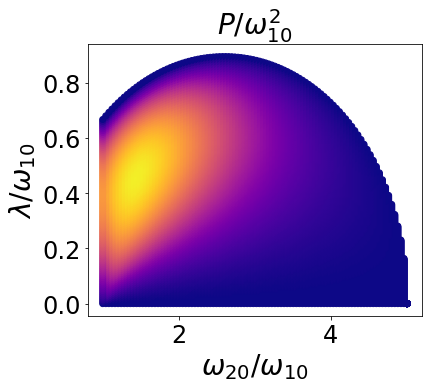

In [953]:
fig = plt.figure(figsize = (6,5))  
ax = fig.add_subplot(1,1,1) 
for i in range(len(var.w20_10)):
    ax.scatter('w_rate_'+str(i),'lambda_w10_'+str(i) \
           , c = 'power_'+str( i),data = DATOS, cmap='plasma',vmin=0, vmax= 0.08 )
    
    # Add a colorbar

plt.xlabel(r'$\omega_{20}/\omega_{10}$', fontsize =28)
plt.ylabel(r'$ \lambda/\omega_{10}$',fontsize=28)
plt.title(r'$ P/\omega_{10}^2$',fontsize=28)



plt.savefig(os.path.join(my_path1,'3level_power.eps'))

    

In [954]:
# <0|rho|0>
def R00(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m
    g1m = var.g1m
    g2 = var.g2
    g1 = var.g1
    omega = var.omega
    G = var.G

    return (1/2*( ((1-c**2)*omega**2)/g1+G + ((1-c**2)*omega**2)/g2+G ) )\
            /( (1/2+(g2m/g2))*( ((1-c**2)*omega**2)/g1+G )\
             +(1/2+(g1m/g1))*( ((1-c**2)*omega**2)/g2+G ) )
def P0(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2 = var.g2
    g1 = var.g1
    bh = var.b_h
    bc = var.b_c
    q1 = var.q1
    q2 = var.q2
    return e_10*q1*(1-q1)*g1*( np.exp(-bh*e_10)-np.exp(-bc*e_10))\
          +e_20*q2*(1-q2)*g2*( np.exp(-bh*e_20)-np.exp(-bc*e_20))
    
    return result

def n_q(var):
    e_20 = var.e_20
    e_10 = var.e_10
    q1 = var.q1
    q2 = var.q2
    return (1- e_10/e_20)/(1- q2 -(e_10/e_20)*q1 )

def Qc(var,p,n,r0,p0):
    e_20 = var.e_20
    e_10 = var.e_10
    nq = n
    return  (-(1-nq)/nq)*p -r0*p0

def Qh(var,p,qd):
    e_20 = var.e_20
    e_10 = var.e_10
    nq = n
    return (1/nq)*p +r0*p0
# entropy production
def sigma(var,qc,qh):
    return -(var.b_h*qh +var.b_l*qc)


In [955]:
#Efficiency  
def EFF(p,r0,p0,n):
    return p/(p/n + r0*p0)    

In [956]:
#efficiency visualization

P = POWER(var)
rho = R00(var)
p0 = P0(var)
nq = n_q(var)
eff= EFF(P,rho,p0,nq)


<ipython-input-955-f7c3b0869090>:3: RuntimeWarning: invalid value encountered in true_divide
  return p/(p/n + r0*p0)


In [957]:

def data2(var,EF,P):
    l1= len(var.w20_10)
    l2= len(var.l.T)
    d = {}
    df = pd.DataFrame(data=d)
    for i in range(l1):
        df['w_rate_'+str(i)]= np.array(l2*[var.w20_10[i]])
        df['lambda_w10_'+str(i)]= var.l[i]
        df['eff_'+str(i)]= EF[i]
        df['power_'+str(i)]= P[i]
    return df    
           
DATOS2= data2(var,nq,P)



<ipython-input-957-23e50173129a>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['w_rate_'+str(i)]= np.array(l2*[var.w20_10[i]])
<ipython-input-957-23e50173129a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lambda_w10_'+str(i)]= var.l[i]
<ipython-input-957-23e50173129a>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['eff_'+str(i)]= EF[i]
<ipython-input-957-23e50173129a>:10: PerformanceW

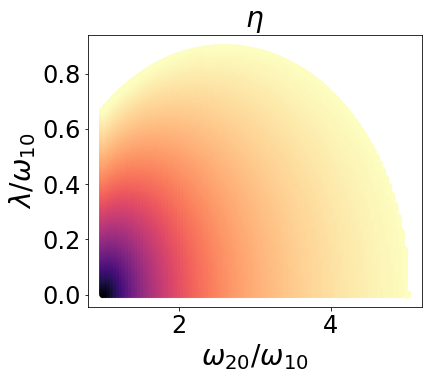

In [958]:
fig = plt.figure(figsize = (6,5))  
ax = fig.add_subplot(1,1,1) 
for i in range(len(var.w20_10)):
    ax.scatter('w_rate_'+str(i),'lambda_w10_'+str(i) \
           , c = 'eff_'+str( i),data = DATOS2, cmap = 'magma',vmin=0, vmax= 0.8 )
    
    # Add a colorbar

plt.xlabel(r'$\omega_{20}/\omega_{10}$', fontsize =28)
plt.ylabel(r'$ \lambda/\omega_{10}$',fontsize=28)
plt.title(r'$ \eta$',fontsize=28)


plt.savefig(os.path.join(my_path1,'3level_eff.eps'))

    

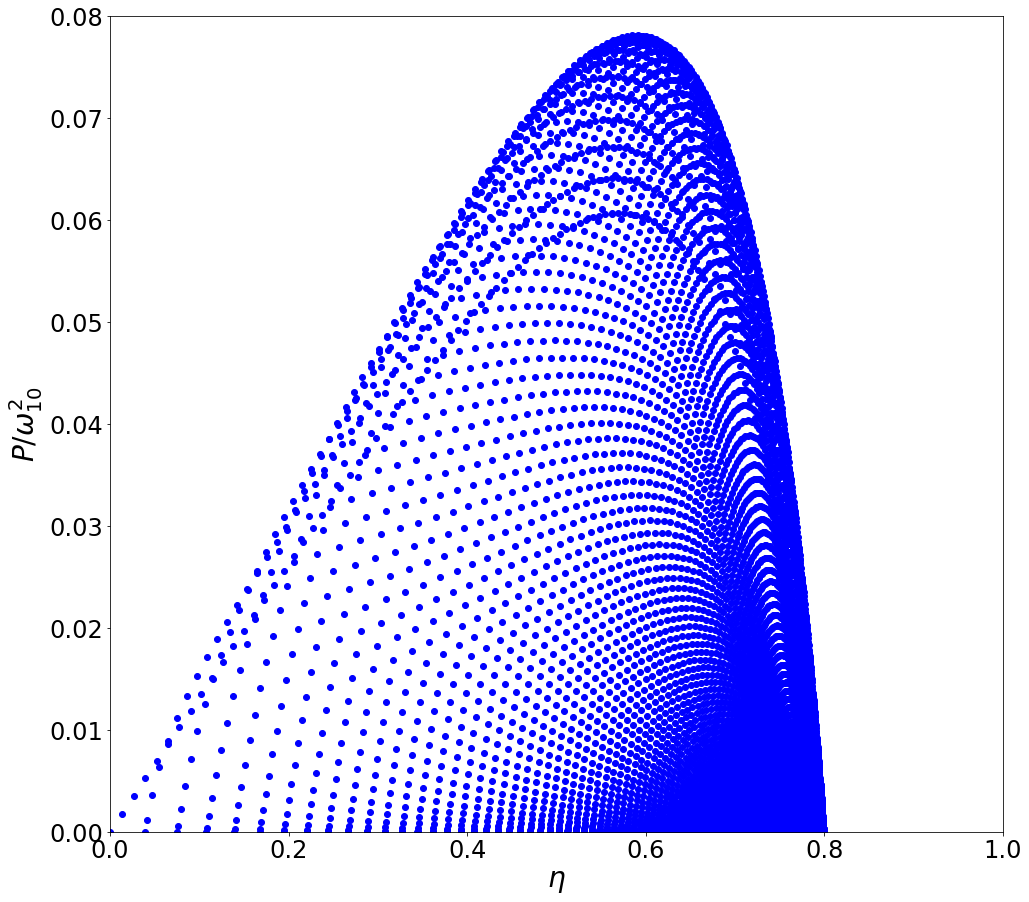

In [959]:
for i in range(len(var.w20_10)):
    plt.scatter(DATOS2['eff_'+str(i)],DATOS['power_'+str(i)],vmin=0, vmax= 0.8,  color = 'blue')
    plt.xlim(0,1)
    plt.ylim(-0,0.08)
plt.ylabel(r'$ P/\omega_{10}^2$', fontsize =28)
plt.xlabel(r'$ \eta$',fontsize=28)
plt.savefig(os.path.join(my_path1,'3level_p_at_max_eff.eps'))
    


In [ ]:
#mixed figures

fig  = plt.figure(constrained_layout=True)
widths = [8,8]
heights = [8, 8]
specs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
                          height_ratios=heights)

vmax1=max([ max(value) for value in n_fi if len(value)>0 ])
vmax2=max([ max(value) for value in P_fi if len(value)>0 ])




ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])
ax3 = fig.add_subplot(specs[1,0])


for i in range(len(var.w20_10)):
    ax1.scatter('w_rate_'+str(i),'lambda_w10_'+str(i) \
           , c = 'efficiency_'+str( i),data = DATOS, cmap = 'magma', vmin=0, vmax= vmax1)
    
    # Add a colorbar

ax1.set_xlabel(r'$\omega_{20}/\omega_{10}$', fontsize =28)
ax1.set_ylabel(r'$ \lambda/\omega_{10}$',fontsize=28)
ax1.set_title(r'$\frac{P}{\omega_{10}^2}$',fontsize=28)

for i in range(len(var.w20_10)):
    ax2.scatter('w_rate_'+str(i),'lambda_w10_'+str(i) \
           , c = 'power_'+str( i),data = DATOS, cmap='plasma', vmin=0, vmax= vmax2 )
    
    # Add a colorbar
    
ax2.set_xlabel(r'$\omega_{20}/\omega_{10}$', fontsize =28)
ax2.set_ylabel(r'$ \lambda/\omega_{10}$',fontsize=28)
ax2.set_title(r'$\eta$',fontsize=28)

for i in range(len(var.w20_10)):
  
  ax3.scatter(DATOS['efficiency_'+str(i)],DATOS['power_'+str(i)],  color = 'blue')

ax3.set_xlabel(r'$\eta$', fontsize =28)
ax3.set_ylabel(r'$ \frac{P}{\omega_{10}^2}$',fontsize=28)
  